In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Excel Datei einlesen

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_projekt_mpg.xlsx to data_projekt_mpg.xlsx


In [ ]:
df = pd.read_excel("data_projekt_mpg.xlsx")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


 # 1.Data Cleaning

In [ ]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [ ]:
# Fehlende Werte (Null-Werte) in den genannten Spalten werden entfernt, da deren Anteil gering ist und die Gesamtqualität der Analyse dadurch nicht beeinträchtigt wird.

df = df.dropna(subset=['Engine Fuel Type', 'Engine Cylinders', 'Engine HP', 'Number of Doors'])

df.loc[:, 'Market Category'] = df['Market Category'].fillna("Another")

In [ ]:
# Gegenkontrolle
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [ ]:
# Nur Fahrzeuge ab dem Jahr 1995 werden berücksichtigt.
df = df[df['Year'] >= 1995].copy()

In [ ]:
# Die Spalten werden in das Ganzzahlformat (integer) konvertiert, um sicherzustellen, dass nur valide numerische Werte ohne Nachkommastellen verarbeitet werden.

df['Engine HP'] = df['Engine HP'].astype(int)
df['Engine Cylinders'] = df['Engine Cylinders'].astype(int)
df['Number of Doors'] = df['Number of Doors'].astype(int)

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# Serie Vehicle Style & Market Category werden in Kleinbuchstaben ungewandelt.
df.loc[:, "Vehicle Style"] = df["Vehicle Style"].str.lower()
df.loc[:, "Market Category"] = df["Market Category"].str.lower()

loc[] ist ein Zugriffswerkzeug in Pandas, mit dem man Zellen gezielt ansprechen und verändern kann.

df.loc[] ... nimmt z.B. alle Zeilen in der Spalte "Vehicle Style" und ersetzt sie mit der kleingeschriebenen Version.

In [ ]:
print(f"Der Datensatz enthält nach der Datenbereinigung nur noch {len(df)} Datensätze.")

df.head()

Der Datensatz enthält nach der Datenbereinigung nur noch 10990 Datensätze.


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,high-performance",Compact,coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,luxury,Compact,convertible,28,18,3916,34500


# 2. Feature-Engineering

In [ ]:
# Total MPG berechnen
df["Total MPG"] = ((df["city mpg"] + df["highway MPG"]) / 2).round(1)

In [ ]:
# Preis pro PS berechnen
df["Price per HP"] = (df["MSRP"] / df["Engine HP"]) .round(2)

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5,137.72
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5,135.50
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0,121.17
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0,128.04
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,luxury,Compact,convertible,28,18,3916,34500,23.0,150.00


# 3. Explorative Datenanalyse (EDA)

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Total MPG,Price per HP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"factory tuner,luxury,high-performance",Compact,coupe,26,19,3916,46135,22.5,137.72
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,convertible,28,19,3916,40650,23.5,135.50
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"luxury,high-performance",Compact,coupe,28,20,3916,36350,24.0,121.17
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"luxury,performance",Compact,coupe,28,18,3916,29450,23.0,128.04
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,luxury,Compact,convertible,28,18,3916,34500,23.0,150.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,46120,19.5,153.73
11910,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,56670,19.5,188.90
11911,Acura,ZDX,2012,premium unleaded (required),300,6,AUTOMATIC,all wheel drive,4,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50620,19.5,168.73
11912,Acura,ZDX,2013,premium unleaded (recommended),300,6,AUTOMATIC,all wheel drive,4,"crossover,hatchback,luxury",Midsize,4dr hatchback,23,16,204,50920,19.5,169.73


In [ ]:
# Er berechnet den Median jeder dieser Spalten – also den mittleren Wert.
# Der Median ist besonders hilfreich, wenn es Ausreißer gibt (z. B. extrem teure Autos), da er davon weniger beeinflusst wird als der Durchschnitt.

df[["Engine HP" , "MSRP", "Popularity", "highway MPG" , "city mpg"]].median().round(2).sort_values(ascending=False)

,0
MSRP,31265.0
Popularity,1385.0
Engine HP,240.0
highway MPG,26.0
city mpg,18.0


In [ ]:
# Er berechnet den Durchschnitt (Mittelwert) jeder Spalte – also die Summe aller Werte geteilt durch die Anzahl der Einträge.
# So kann man gut den „typischen“ Wert einer Spalte einschätzen, z. B. die durchschnittliche Motorleistung oder Beliebtheit.
df[["Engine HP" , "MSRP", "Popularity", "highway MPG" , "city mpg"]].mean().round(2).sort_values(ascending=False)

,0
MSRP,43434.31
Popularity,1568.01
Engine HP,256.86
highway MPG,26.53
city mpg,19.47


In [ ]:
# Die Standardabweichung zeigt, wie stark die Werte streuen – also wie unterschiedlich die Werte in der Spalte sind.
# Damit erkenne ich, ob sich die Werte ähnlich sind oder ob es große Unterschiede gibt (z. B. bei Preisen)
df[["Engine HP" , "MSRP", "Popularity", "highway MPG" , "city mpg"]].std().round(2).sort_values(ascending=False)

,0
MSRP,61540.31
Popularity,1452.13
Engine HP,108.75
highway MPG,7.53
city mpg,6.65


In [ ]:
# Zuerst habe ich den Durchschnittswert aus Preis und Beliebtheit berechnet.

df["Average Score"] = (df["MSRP"] + df["Popularity"]) / 2

# Danach habe ich ein Dictionary erstellt – mit den Durchschnittswerten je Antriebsart, Fahrzeuggröße und Zylinderanzahl.

groupings = {
    "Driven_Wheels": df.groupby("Driven_Wheels")["Average Score"].mean(),
    "Vehicle Size": df.groupby("Vehicle Size")["Average Score"].mean(),
    "Engine Cylinders": df.groupby("Engine Cylinders")["Average Score"].mean()
}

# Ich habe eine leere Liste vorbereitet, in der später alle Mini-Tabellen gespeichert werden.

summary_list = []

# Die For-Schleife geht jede Gruppe im Dictionary durch, wandelt sie in eine Mini-Tabelle um und speichert sie in meiner Liste.

for name, series in groupings.items():
    temp_df = series.reset_index()
    temp_df.columns = ["Subgroup", "Average Score"]
    temp_df["Group"] = name
    summary_list.append(temp_df)

# Alle "Mini-Tabellen" werden dann verkettet bzw. (mit pd.concat()) zu einer gemeinsamen Tabelle zusammengefügt.

summary_df = pd.concat(summary_list, ignore_index=True)[["Group", "Subgroup", "Average Score"]].round(2)

# Ausgabe
summary_df


,Group,Subgroup,Average Score
0,Driven_Wheels,all wheel drive,30453.77
1,Driven_Wheels,four wheel drive,20110.45
2,Driven_Wheels,front wheel drive,13024.87
3,Driven_Wheels,rear wheel drive,31122.30
4,Vehicle Size,Compact,19624.53
5,Vehicle Size,Large,29346.63
6,Vehicle Size,Midsize,21177.59
7,Engine Cylinders,0,18249.23
8,Engine Cylinders,3,7169.48
9,Engine Cylinders,4,13492.00


In [ ]:
# Kombinierte Gruppierung
# Schritt 1: Average Score berechnen aus Preis und Beliebtheit.
df["Average Score"] = (df["MSRP"] + df["Popularity"]) / 2

# Schritt 2: Gruppieren nach mehreren Spalten (Kombination!)
grouped_df = df.groupby(
    ["Driven_Wheels", "Vehicle Size", "Engine Cylinders"]
)["Average Score"].mean().reset_index()

# 📌 Schritt 3: Ergebnis anzeigen
grouped_df = grouped_df.round(2).sort_values(by="Average Score", ascending=False)
grouped_df

,Driven_Wheels,Vehicle Size,Engine Cylinders,Average Score
6,all wheel drive,Compact,16,879021.83
5,all wheel drive,Compact,12,235438.09
49,rear wheel drive,Large,12,170381.43
16,all wheel drive,Midsize,12,159315.09
53,rear wheel drive,Midsize,12,124824.44
45,rear wheel drive,Compact,12,112697.16
26,four wheel drive,Midsize,12,109258.50
4,all wheel drive,Compact,10,103970.74
10,all wheel drive,Large,12,86938.08
44,rear wheel drive,Compact,10,81363.57


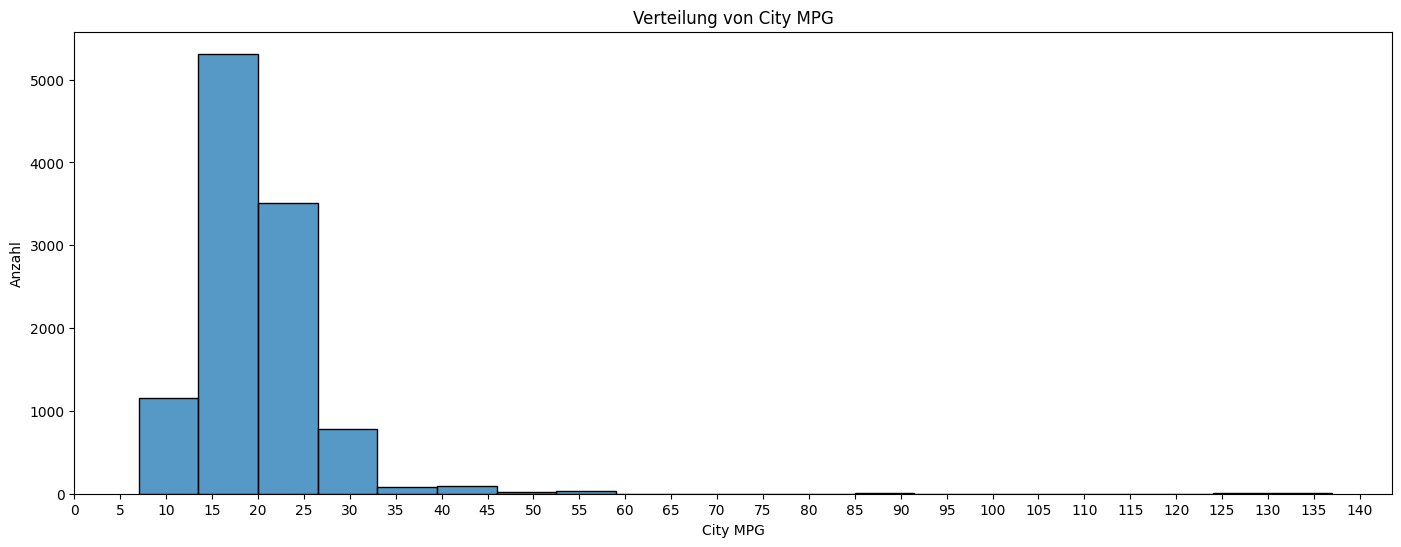

In [ ]:
plt.figure(figsize=(17, 6))

sns.histplot(df['city mpg'], bins=20)
plt.title('Verteilung von City MPG')
plt.xlabel('City MPG')
plt.ylabel('Anzahl')
plt.xticks(range(0, 141, 5))
plt.show()

Das Diagramm zeigt, wie viele Fahrzeuge welchen Durchschnittsverbrauch in der Stadt (City MPG) haben.

X-Achse: Kraftstoffverbrauch (City MPG = Meilen pro Gallone) – je höher, desto sparsamer.

Y-Achse: Wie viele Fahrzeuge es mit diesem Verbrauch gibt.

Die meisten Autos verbrauchen zwischen 15 und 25 MPG – dort sind die höchsten Balken. Es gibt einige Ausreißer nach oben – wahrscheinlich Hybrid- oder Elektroautos.

**Erkenntis**
Die große Mehrheit der Fahrzeuge hat einen mittleren Verbrauch in der Stadt.
Extreme Werte nach oben sind selten, aber möglich – sie beeinflussen die Verteilung.

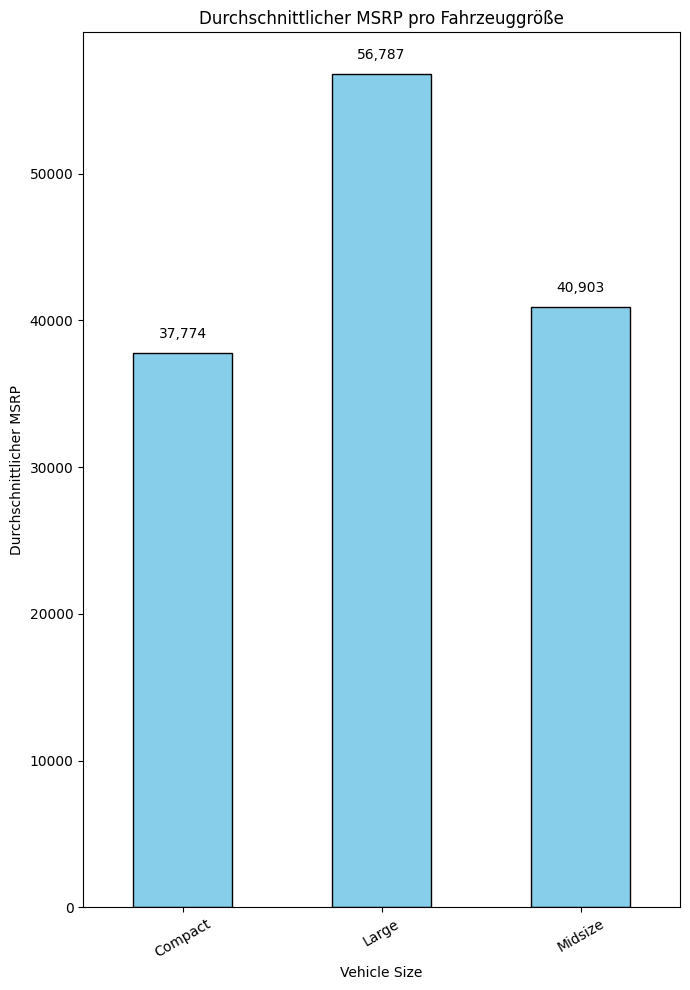

In [ ]:
plt.figure(figsize=(7, 10))

# Mittelwert von MSRP pro Fahrzeuggröße berechnen
average_msrp = df.groupby("Vehicle Size")["MSRP"].mean()

# Balkendiagramm zeichnen
ax = average_msrp.plot(kind="bar", color="skyblue", edgecolor="black")

# Achsen und Titel benennen
plt.xlabel("Vehicle Size")
plt.ylabel("Durchschnittlicher MSRP")
plt.title("Durchschnittlicher MSRP pro Fahrzeuggröße")

# Werte über den Balken anzeigen
for i, value in enumerate(average_msrp):
    ax.text(i, value + 1000, f"{value:,.0f}", ha='center', fontsize=10)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Dieses Diagramm zeigt den durchschnittlichen Fahrzeugpreis (MSRP) abhängig von der Fahrzeuggröße.

Compact (klein)

Midsize (mittelgroß)

Large (groß)

Über jedem Balken steht der genaue Durchschnittspreis.

**Erkenntnis**
Die Fahrzeuggröße hat Einfluss auf den Preis.
Je größer das Fahrzeug, desto höher im Durchschnitt der Preis.

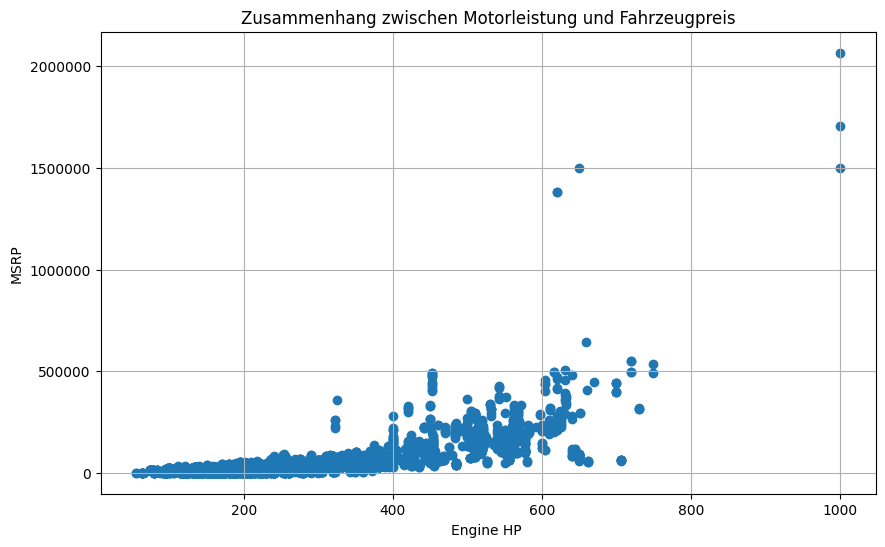

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df["Engine HP"], df["MSRP"])
plt.xlabel("Engine HP ")
plt.ylabel("MSRP")
plt.title("Zusammenhang zwischen Motorleistung und Fahrzeugpreis")
plt.grid()

# Y-Achse im normalen Zahlenformat anzeigen.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Es zeigt den Zusammenhang zwischen der Motorleistung eines Fahrzeugs (Engine HP) und dem Fahrzeugpreis (MSRP).
Jeder Punkt steht für ein Auto. Links unten: Autos mit wenig PS und niedrigem Preis. Rechts oben: Autos mit viel PS und sehr hohem Preis (z. B. Luxus- oder Sportwagen)
Man erkennt: Je stärker der Motor, desto höher oft auch der Preis – aber es gibt auch Ausreißer.

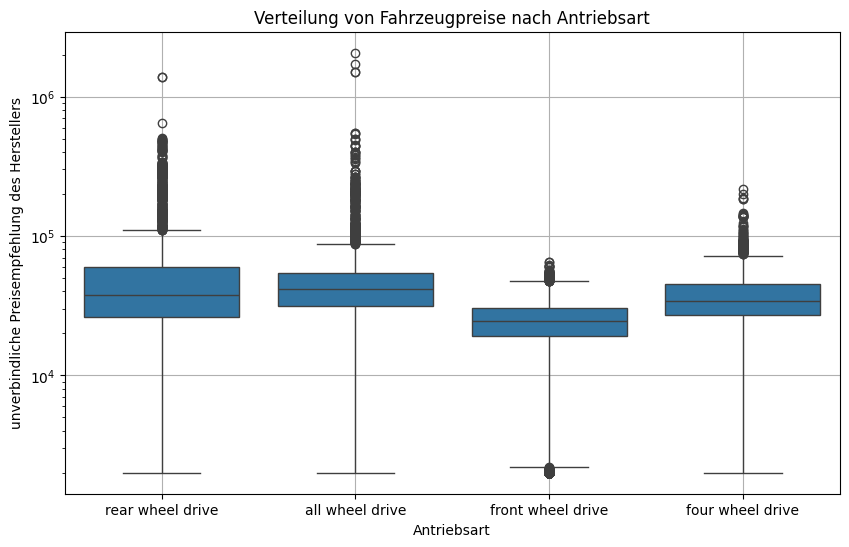

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x= "Driven_Wheels", y= "MSRP", data=df)

plt.yscale("log")
plt.title("Verteilung von Fahrzeugpreise nach Antriebsart")
plt.xlabel("Antriebsart")
plt.ylabel("unverbindliche Preisempfehlung des Herstellers")
plt.grid()

plt.show()

Dieser Plot zeigt, wie sich die Fahrzeugpreise je nach Antriebsart unterscheiden:
Frontantrieb
Allradantrieb
Hinterradantrieb

Den typischen Preisbereich (die Box). Den Median (die Linie in der Mitte).
Ausreißer (die kleinen Kreise ganz oben oder unten)

Die y-Achse ist der Fahrzeugpreis MSRP – und wir haben sie auf logarithmisc(log) gestellt.

**Erkenntis**
Die Antriebsart hat einen Einfluss auf den Fahrzeugpreis.

<Figure size 1000x600 with 0 Axes>

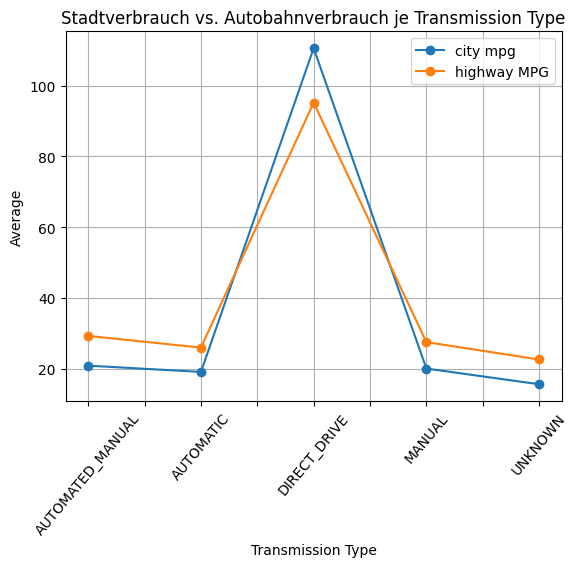

In [ ]:
plt.figure(figsize=(10, 6))
average = df.groupby("Transmission Type")[["city mpg", "highway MPG"]].mean()

average.plot(kind='line', marker= "o")
plt.xlabel("Transmission Type")
plt.ylabel("Average")
plt.title("Stadtverbrauch vs. Autobahnverbrauch je Transmission Type")
plt.xticks(rotation=50)
plt.grid()

plt.show()

Auf der X-Achse stehen die verschiedenen Getriebearten (z. B. Automatik, Manuell, etc.).
Auf der Y-Achse ist der durchschnittliche Verbrauch in Meilen pro Gallone (mpg) – je höher, desto sparsamer.
BLAU: Stadtverbrauch (city mpg)
ORANGE: Autobahnverbrauch (highway MPG). Jeder Punkt steht für den Durchschnittswert je Getriebetyp.

**Erkenntis**
Das Diagramm zeigt, dass der Getriebetyp einen Einfluss auf die Kraftstoffeffizienz hat.
Besonders Fahrzeuge mit Direct Drive (vermutlich Elektro) sind deutlich sparsamer.

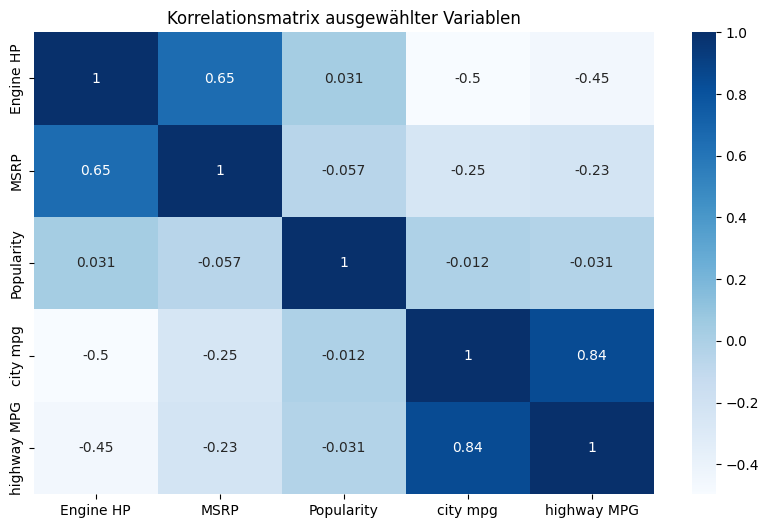

In [ ]:
plt.figure(figsize=(10, 6))

correlation_matrix = df[["Engine HP" , "MSRP", "Popularity", "city mpg", "highway MPG"]].corr()

sns.heatmap(correlation_matrix, annot= True, cmap= 'Blues')
plt.title("Korrelationsmatrix ausgewählter Variablen")

plt.show()

# Projektanalyse sowie gewonnen Erkenntisse und Muster:

Größere Fahrzeuge (Large) haben den höchsten durchschnittlichen MSRP, während kleinere (Compact) am günstigsten sind – Midsize liegt dazwischen. Das zeigt, dass der Fahrzeugpreis tendenziell mit der Größe steigt.

Mit steigender Motorleistung (Engine HP) steigt tendenziell auch der Fahrzeugpreis (MSRP) – besonders ab ca. 400 PS wird der Anstieg deutlicher. Es gibt aber auch Ausreißer mit sehr hohem Preis.

"All wheel drive" und "Rear wheel drive" zeigen eine höhere Preisspanne und Medianpreise – sie sind im Schnitt teurer.

"Front wheel drive" weist tendenziell niedrigere Medianwerte auf.

Die Getriebeart hat einen spürbaren Einfluss auf den Kraftstoffverbrauch.

### Resümee:

Stärkere Motoren sind teurer – logisch, denn sie werden oft in Premium- oder Sportfahrzeugen verbaut.

Große Fahrzeuge bieten mehr Ausstattung, Raum oder Leistung – was sich im Preis widerspiegelt.

Engine HP und MSRP: starke positive Korrelation (0.65) → mehr PS, höherer Preis.

City MPG & Highway MPG: sehr starke Korrelation (0.89) → je effizienter ein Auto in der Stadt, desto effizienter auch auf der Autobahn.

Die Mehrheit der Fahrzeuge ist mittelmäßig effizient, Ausreißer sind selten.